In [1]:
import pandas as pd
import numpy as np

In [2]:
# Importing essential libraries
from keras.preprocessing.image import ImageDataGenerator

In [10]:
DIRECTORY = r'C:\Users\Personal\Downloads\training_set'
CATEGORIES = ['cat','dog']

In [11]:
train_datagen=DIRECTORY
# Preprocessing the Training set

# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Importing Training set
training_set = train_datagen.flow_from_directory(r'C:\Users\Personal\Downloads\training_set',
                                                    target_size=(64, 64),
                                                    batch_size=32,
                                                    class_mode='binary')

Found 8005 images belonging to 2 classes.


In [15]:
DIRECTORY1 = r'C:\Users\Personal\Downloads\test_set'
CATEGORIES1 = ['cat','dog']

In [16]:
test_datagen=DIRECTORY1
# Preprocessing the Test set

# Feature Scaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Importing Test set
test_set = test_datagen.flow_from_directory(r'C:\Users\Personal\Downloads\test_set',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 2023 images belonging to 2 classes.


## Building the CNN

In [17]:
# Importing essential libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [18]:
# Initialising the CNN
cnn = Sequential()

In [19]:
# Step 1 - Add Convolution Layer
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [20]:
# Step 2 - Add Pooling Layer
cnn.add(MaxPool2D(pool_size=2, strides=2))

In [21]:
# Add second onvolutional layer with pooling
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

In [22]:
# Step 3 - Add Flattening Layer
cnn.add(Flatten())

In [23]:
# Step 4 - Add Full Connected Layer
cnn.add(Dense(units=128, activation='relu'))

In [24]:
# Step 5 - Add Output Layer
cnn.add(Dense(units=1, activation='sigmoid'))

In [25]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

## Training the CNN

In [26]:
# Compiling the CNN
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
# Training the CNN on the Training set and evaluating it on the Test set
model_history = cnn.fit(x=training_set, validation_data=test_set, epochs=25)

Epoch 1/25
251/251 [==============================] - 235s 918ms/step - loss: 0.6817 - accuracy: 0.5614 - val_loss: 0.6558 - val_accuracy: 0.6125
Epoch 2/25
251/251 [==============================] - 67s 268ms/step - loss: 0.6082 - accuracy: 0.6677 - val_loss: 0.6807 - val_accuracy: 0.6095
Epoch 3/25
251/251 [==============================] - 73s 291ms/step - loss: 0.5749 - accuracy: 0.6988 - val_loss: 0.5992 - val_accuracy: 0.6817
Epoch 4/25
251/251 [==============================] - 71s 281ms/step - loss: 0.5450 - accuracy: 0.7212 - val_loss: 0.5257 - val_accuracy: 0.7523
Epoch 5/25
251/251 [==============================] - 70s 278ms/step - loss: 0.5108 - accuracy: 0.7425 - val_loss: 0.5051 - val_accuracy: 0.7593
Epoch 6/25
251/251 [==============================] - 71s 282ms/step - loss: 0.4933 - accuracy: 0.7574 - val_loss: 0.4949 - val_accuracy: 0.7741
Epoch 7/25
251/251 [==============================] - 70s 277ms/step - loss: 0.4775 - accuracy: 0.7714 - val_loss: 0.4876 - val_a

## Model Evaluation

In [28]:
# Importing essential libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
# List all data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


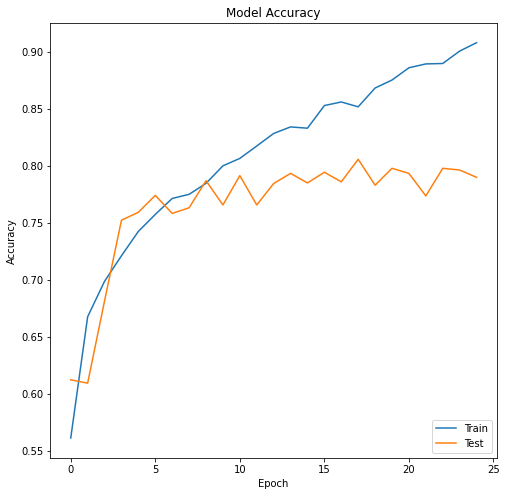

In [30]:
# Summarize history for accuracy
plt.figure(figsize=(8,8))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

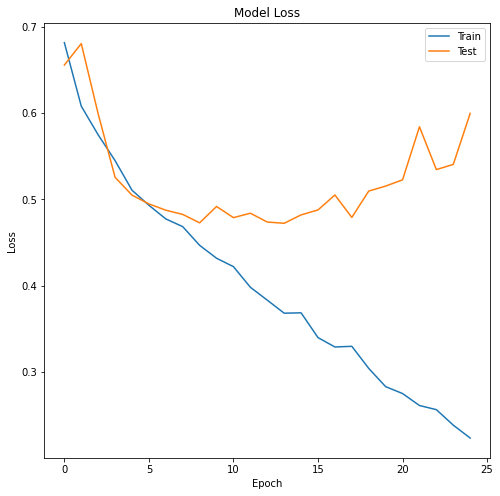

In [31]:
# Summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

## Making Prediction

In [32]:
# Importing essential libraries
import numpy as np
from keras.preprocessing import image

## Prediction 1

In [36]:
test_image = image.load_img(r'C:\Users\Personal\Downloads\test_set\dogs\dog.4003.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

if result[0][0] == 1:
  print("Prediction: It's a Dog's image.")
else:
  print("Prediction: It's a Cat's image.")

Prediction: It's a Dog's image.
